In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#don't run this part
%cd gdrive/My\ Drive/data

/content/gdrive/My Drive/data


In [ ]:
import tweepy
import json
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# WorldPoetryDay = pd.read_csv('WorldPoetryDay.csv')
PsosmDataset = pd.read_csv('PsosmDataset.csv')

PsosmDataset = PsosmDataset.iloc[:,:]
PsosmDataset.head()

,res,full_text,retweet_count,favorite_count,Hashtag
0,0,RT @thehomeof_fb: Going to make a tournament o...,2.0,0.0,neymar.
1,1,"RT @Nss_Lakshya: March 23rd 1931, is the day w...",11.0,0.0,MartyrsDay
2,1,#Chelsea at #Porto? 3pm ET #PORCHE #ucl #Champ...,0.0,0.0,championsleague.
3,1,"By 2040, global energy demand is projected to ...",0.0,0.0,WorldWaterDay.
4,1,RT @doorva207: Finally Kejriwαl will understan...,40.0,0.0,GNCTDBill


In [ ]:
PsosmDatasetNp = PsosmDataset.to_numpy()
print(PsosmDatasetNp.shape)
# X, y = WorldPoetryDayNp[:,[2,4,15,22,23]],WorldPoetryDayNp[:,0]
X, y = PsosmDatasetNp[:,1],PsosmDatasetNp[:,0]
retweetFavCountX = PsosmDatasetNp[:,[2,3]]
print(X.shape)
print(y.shape)
print(retweetFavCountX.shape)
print(X[:5])
print(y[:5])
Xn = []
yn = []
rtn = []
for i in range(len(X)):
  # print(y[i])
  # print(int(y[i]))
  if((y[i] == 0 or y[i] == 1) and int(y[i]) >= 2):
    continue
  else:
    Xn.append(X[i])
    yn.append(y[i])
    rtn.append(retweetFavCountX[i])
  # break
X = np.array(Xn); y = np.array(yn); retweetFavCountX = np.array(rtn)
print(X.shape)
print(y.shape)
print(retweetFavCountX.shape)
print(X[:5])
print(y[:5])
print(retweetFavCountX[:5])
# print(y.unique())

(13894, 5)
(13894,)
(13894,)
(13894, 2)
['RT @thehomeof_fb: Going to make a tournament of the best 16 one season teams for example (Chelsea 04-05), I’ll host it on my Instagram (@Th…'
 'RT @Nss_Lakshya: March 23rd 1931, is the day when freedom fighters Bhagat Singh ,Sukhdev and Rajguru sacrificed their lives for the country…'
 '#Chelsea at #Porto? 3pm ET #PORCHE #ucl #ChampionsLeague #soccer'
 'By 2040, global energy demand is projected to increase by over 25% and water demand is expected to increase by more than 50%.\n\n#WorldWaterDay\n#ValuingWater https://t.co/cEFq95OS7H'
 'RT @doorva207: Finally Kejriwαl will understand how it feels to be Mαnmohαn singh. \n\n#GNCTDBill']
[0 1 1 1 1]
(13894,)
(13894,)
(13894, 2)
['RT @thehomeof_fb: Going to make a tournament of the best 16 one season teams for example (Chelsea 04-05), I’ll host it on my Instagram (@Th…'
 'RT @Nss_Lakshya: March 23rd 1931, is the day when freedom fighters Bhagat Singh ,Sukhdev and Rajguru sacrificed their lives for t

1    12283
0     1611
Name: 0, dtype: int64


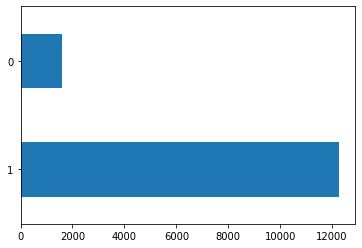

In [ ]:
#plotting class frequency
label = pd.DataFrame(y)
classFreq = label[0].value_counts()
print(classFreq)
classFreq.plot.barh()
plt.show()

In [ ]:
#run down sampling or up sampling code
#down samplling
length = len(X)
Xn = []; yn = []
for i in range(length):
  if(y[i] == 0):
    yn.append(y[i])
    Xn.append(X[i])
for i in range(4*len(Xn)+20):
  if(y[i] == 1):
    yn.append(y[i])
    Xn.append(X[i])
X = np.array(Xn); y = np.array(yn)
print(y)


[0 0 0 ... 1 1 1]


In [ ]:
# up sampling 
length = len(X)
Xn = []; yn = []
for i in range(5):
  for i in range(length):
    if(y[i] == 0):
      yn.append(y[i])
      Xn.append(X[i])
for i in range(len(Xn)):
  if(y[i] == 1):
    yn.append(y[i])
    Xn.append(X[i])
X = np.array(Xn); y = np.array(yn)
print(y)

[0 0 0 ... 1 1 1]


0    8055
1    7116
Name: 0, dtype: int64


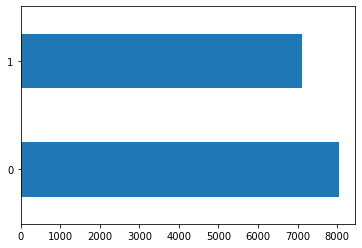

In [ ]:
#plotting class frequency after down samplling
label = pd.DataFrame(y)
classFreq = label[0].value_counts()
print(classFreq)
classFreq.plot.barh()
plt.show()

In [ ]:
import glob
import nltk
import string
import numpy as np
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def preprocessing(doc):
  puncd = {  }
  for i in string.punctuation:
    puncd[i] = ' '
  doc = doc.translate(str.maketrans(puncd))                     #replacing the punctuation marks with white spaces. 
  doc = doc.strip()                                             #removing the extra white space characters. 
  doc = doc.lower()                                             #making the string to lower case letters. 

  tokens = word_tokenize(doc)                                         #tokenise the words to a list. 
  tokens_NoStop = [i for i in tokens if i not in stop_words]                #removing the stop words from the tokenised list. 
  lemmatizer=WordNetLemmatizer()
  lemmedWordtext = []
  for i in range(len(tokens_NoStop)):
    lemmedWordtext.append(lemmatizer.lemmatize(tokens_NoStop[i]))           #appending the lemmatized word in the list
  return lemmedWordtext
Xnew = []
for i in range(len(X)):
  preProcessed = preprocessing(X[i])
  # print(preProcessed)
  # preProcessed.append(X[i][1])
  # preProcessed.append(X[i][2])
  Xnew.append(preProcessed)

print(Xnew[:5])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[['rt', 'thehomeof', 'fb', 'going', 'make', 'tournament', 'best', '16', 'one', 'season', 'team', 'example', 'chelsea', '04', '05', '’', 'host', 'instagram', 'th…'], ['rt', 'cyfashion1', 'oral', 'b', 'darth', 'vader', 'official', 'p2000', 'electronic', 'troothbrush', 'p2000', '244fc', '48800p', '2', 'mode', 'rm299', 'autismawarenessday', 'barug…'], ['rt', 'saahilmenghani', 'number', 'shoot', 'farmersprotest', 'site', 'young', 'farmer', 'arrive', 'village', 'martyrsday', 'शहीद', 'दिवस', 'singhu…'], ['rt', 'amardeep', '1408', '21st', 'century', 'einstein', 'fighting', 'rojgar', 'modi', 'rojgar', 'दो', 'modi', 'rojgar', 'railapprentice', 'ko', 'rojgar

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y, random_state=37)
print(X_train.shape)
print(X_test.shape)

(10164,)
(5007,)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.feature_extraction.text import CountVectorizer             #vectorizing text data
vectorizer = CountVectorizer(tokenizer = preprocessing)#,stop_words=stop_words
X_trainT = vectorizer.fit_transform(X_train)
features = vectorizer.get_feature_names()
print("No of features after vectorizing X_train:", len(features))
X_testT  = vectorizer.transform(X_test)
print("shape of X_trainT:", X_trainT.shape)
X_T = vectorizer.fit_transform(X)


No of features after vectorizing X_train: 15935
shape of X_trainT: (10164, 15935)


In [ ]:
#applying different models
from sklearn.naive_bayes import MultinomialNB
MNBclf = MultinomialNB(class_prior = [0.5, 0.5])
y_train = y_train.astype('i')
print(y_train.dtype)
MNBclf.fit(X_trainT, y_train)

y_pred = MNBclf.predict(X_testT)
print("shape of y pred",y_pred.shape)
print("shape of y test",y_test.shape)
print(y_pred[:100])
print(y_test[:100])
y_test = y_test.astype('i')
print("Accuracy: ",accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test,y_pred))
# X_trainT
#saving model then reading it again
pickle.dump(MNBclf, open('MNBclfModel.sav', 'wb'))
MNBclf = pickle.load(open('MNBclfModel.sav', 'rb'))

int32
shape of y pred (5007,)
shape of y test (5007,)
[0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1
 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1]
[0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1
 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1
 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1]
Accuracy:  0.9279009386858398
[[2481  177]
 [ 184 2165]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2658
           1       0.92      0.92      0.92      2349

    accuracy                           0.93      5007
   macro avg       0.93      0.93      0.93      5007
weighted avg       0.93      0.93      0.93      5007



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

LOGclf = LogisticRegression(random_state=0, n_jobs = -1, max_iter = 1000, verbose= 2)
LOGclf.fit(X_trainT, y_train)

y_pred = LOGclf.predict(X_testT)

#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

#saving model then reading it again
pickle.dump(LOGclf, open('LOGclfModel.sav', 'wb'))
LOGclf = pickle.load(open('LOGclfModel.sav', 'rb'))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Testing accuracy: 0.963650888755742
[[2618   40]
 [ 142 2207]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2658
           1       0.98      0.94      0.96      2349

    accuracy                           0.96      5007
   macro avg       0.97      0.96      0.96      5007
weighted avg       0.96      0.96      0.96      5007



[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


In [ ]:
from sklearn.neighbors import KNeighborsClassifier #take more than 3 min (1m2s 75), (27m, 90.8%)
KNNclf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',n_jobs = -1)
KNNclf.fit(X_trainT, y_train)
# Predicting the Test set results
y_pred = KNNclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

#saving model then reading it again
pickle.dump(KNNclf, open('KNNclfModel.sav', 'wb'))
KNNclf = pickle.load(open('KNNclfModel.sav', 'rb'))

Testing accuracy: 0.8773716796484922
[[2405  253]
 [ 361 1988]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      2658
           1       0.89      0.85      0.87      2349

    accuracy                           0.88      5007
   macro avg       0.88      0.88      0.88      5007
weighted avg       0.88      0.88      0.88      5007



In [ ]:
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
GNBclf.fit(X_trainT.toarray(), y_train)
y_pred = GNBclf.predict(X_testT.toarray())

print("Accuracy: ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

#saving model then reading it again
pickle.dump(GNBclf, open('GNBclfModel.sav', 'wb'))
GNBclf = pickle.load(open('GNBclfModel.sav', 'rb'))

Accuracy:  0.8869582584381865
[[2658    0]
 [ 566 1783]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2658
           1       1.00      0.76      0.86      2349

    accuracy                           0.89      5007
   macro avg       0.91      0.88      0.88      5007
weighted avg       0.91      0.89      0.88      5007



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
SVMclf = SVC(probability=False,random_state=1, kernel='rbf')
SVMclf.fit(X_trainT, y_train)
# Predicting the Test set results
y_pred = SVMclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

#saving model then reading it again
pickle.dump(SVMclf, open('SVMclfModel.sav', 'wb'))
SVMclf = pickle.load(open('SVMclfModel.sav', 'rb'))

Testing accuracy: 0.9626522867984821
[[2570   88]
 [  99 2250]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2658
           1       0.96      0.96      0.96      2349

    accuracy                           0.96      5007
   macro avg       0.96      0.96      0.96      5007
weighted avg       0.96      0.96      0.96      5007



In [ ]:
from sklearn.ensemble import RandomForestClassifier  #5s 78%
RFclf = RandomForestClassifier(max_depth = 39, bootstrap = True, n_estimators = 1000, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 2)
RFclf.fit(X_trainT, y_train)

y_pred = RFclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#12>89.44
#20>95.7
#100, 40, 95.8
#100, 35, 95.88
#100, pca30, 92
#100, w/oPcA 400, 96.03
#saving model then reading it again
pickle.dump(RFclf, open('RFclfModel.sav', 'wb'))
RFclf = pickle.load(open('RFclfModel.sav', 'rb'))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.0s


building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000
building tree 81 of 1000
building tree 82 of 1000


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    4.1s


building tree 161 of 1000
building tree 162 of 1000
building tree 163 of 1000
building tree 164 of 1000
building tree 165 of 1000
building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000building tree 186 of 1000

building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000
building tree 198 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:    9.3s


building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tree 403 of 1000
building tree 404 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   16.6s


building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tree 687 of 1000
building tree 688 of 1000
building tree 689 of 1000
building tree 690 of 1000
building tree 691 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   25.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.9s finished


Testing accuracy: 0.8931495905731975
[[2298  360]
 [ 175 2174]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.90      2658
           1       0.86      0.93      0.89      2349

    accuracy                           0.89      5007
   macro avg       0.89      0.90      0.89      5007
weighted avg       0.90      0.89      0.89      5007



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier  #5s 78%
ETclf = ExtraTreesClassifier(max_depth = 39, bootstrap = True, n_estimators = 1000, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 2)
ETclf.fit(X_trainT, y_train)

y_pred = ETclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#12>89.44
#20>95.7
#100, 40, 95.8
#100, 35, 95.88
#100, pca30, 92
#100, w/oPcA 400, 96.03
#saving model then reading it again
pickle.dump(ETclf, open('ETclfModel.sav', 'wb'))
ETclf = pickle.load(open('ETclfModel.sav', 'rb'))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.9s


building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    3.6s


building tree 160 of 1000
building tree 161 of 1000
building tree 162 of 1000
building tree 163 of 1000
building tree 164 of 1000
building tree 165 of 1000
building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:    8.0s


building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tree 403 of 1000
building tree 404 of 1000
building tree 405 of 1000
building tree 406 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   14.2s


building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   21.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.9s finished


Testing accuracy: 0.8943479129219093
[[2250  408]
 [ 121 2228]]
              precision    recall  f1-score   support

           0       0.95      0.85      0.89      2658
           1       0.85      0.95      0.89      2349

    accuracy                           0.89      5007
   macro avg       0.90      0.90      0.89      5007
weighted avg       0.90      0.89      0.89      5007



In [ ]:
from sklearn.neural_network import MLPClassifier #(1m 48s 70)
MLPclf = MLPClassifier(batch_size = 512, early_stopping=True, hidden_layer_sizes=(256,128,64,32,16), random_state=37 ,max_iter=450, learning_rate_init=0.01, tol=0.0000001,n_iter_no_change = 20, verbose = True)
MLPclf.fit(X_trainT, y_train)
# Predicting the Test set results
# print(X_train.shape)
y_pred = MLPclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

pickle.dump(MLPclf, open('bestMLPModel.sav', 'wb'))
MLPclf = pickle.load(open('bestMLPModel.sav', 'rb'))

Iteration 1, loss = 0.32825607
Validation score: 0.965585
Iteration 2, loss = 0.07426211
Validation score: 0.967552
Iteration 3, loss = 0.04869445
Validation score: 0.968535
Iteration 4, loss = 0.04198971
Validation score: 0.967552
Iteration 5, loss = 0.03719674
Validation score: 0.968535
Iteration 6, loss = 0.03617612
Validation score: 0.969518
Iteration 7, loss = 0.03659345
Validation score: 0.964602
Iteration 8, loss = 0.03415940
Validation score: 0.964602
Iteration 9, loss = 0.03389560
Validation score: 0.963618
Iteration 10, loss = 0.03306151
Validation score: 0.961652
Iteration 11, loss = 0.03443293
Validation score: 0.967552
Iteration 12, loss = 0.03530015
Validation score: 0.968535
Iteration 13, loss = 0.03340659
Validation score: 0.968535
Iteration 14, loss = 0.03309002
Validation score: 0.966568
Iteration 15, loss = 0.03167687
Validation score: 0.964602
Iteration 16, loss = 0.03169208
Validation score: 0.961652
Iteration 17, loss = 0.03155572
Validation score: 0.968535
Iterat

In [ ]:
from xgboost import XGBClassifier #(1m 14s 78)
XGBclf = XGBClassifier(max_depth = 15, n_estimators = 2000, n_jobs = -1,random_state=37, verbosity=2)
XGBclf.fit(X_trainT, y_train)
y_pred = XGBclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

#saving model then reading it again
pickle.dump(XGBclf, open('XGBclfModel.sav', 'wb'))
XGBclf = pickle.load(open('XGBclfModel.sav', 'rb'))

[11:27:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 276 extra nodes, 0 pruned nodes, max_depth=15
[11:27:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=15
[11:27:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 212 extra nodes, 0 pruned nodes, max_depth=15
[11:27:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 196 extra nodes, 0 pruned nodes, max_depth=15
[11:27:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=15
[11:27:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 192 extra nodes, 0 pruned nodes, max_depth=15
[11:27:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 214 extra nodes, 0 pruned nodes, max_depth=15
[11:27:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots

In [ ]:
from sklearn.ensemble import AdaBoostClassifier  #1m 54s 67
ADBclf = AdaBoostClassifier(n_estimators=10000, random_state=37, learning_rate = 0.1, algorithm='SAMME')
ADBclf.fit(X_trainT, y_train)
y_pred = ADBclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test,y_pred))
#0.8,1000 > 88.95
#0.8, 100 > 82
#1, 100 > 84.3
#saving model then reading it again
pickle.dump(ADBclf, open('ADBclfModel.sav', 'wb'))
ADBclf = pickle.load(open('ADBclfModel.sav', 'rb'))

Testing accuracy: 0.7605352506490912
[[1899  759]
 [ 440 1909]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.76      2658
           1       0.72      0.81      0.76      2349

    accuracy                           0.76      5007
   macro avg       0.76      0.76      0.76      5007
weighted avg       0.77      0.76      0.76      5007



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier #6 min #13s 69 #2m6s 73
GBclf = GradientBoostingClassifier(n_estimators=5000, learning_rate=0.2,max_depth=5, random_state=37, verbose = 1)
GBclf.fit(X_trainT, y_train)
y_pred = GBclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test,y_pred))
#saving model then reading it again
pickle.dump(GBclf, open('GBclfModel.sav', 'wb'))
GBclf = pickle.load(open('GBclfModel.sav', 'rb'))
#89

      Iter       Train Loss   Remaining Time 
         1           1.2960            4.60m
         2           1.2382            4.42m
         3           1.1806            4.55m
         4           1.1426            4.81m
         5           1.1129            4.74m
         6           1.0879            4.63m
         7           1.0651            4.57m
         8           1.0491            4.49m
         9           1.0324            4.49m
        10           1.0180            4.48m
        20           0.9153            4.13m
        30           0.8465            4.03m
        40           0.7958            3.95m
        50           0.7524            3.89m
        60           0.7153            3.86m
        70           0.6802            3.82m
        80           0.6525            3.77m
        90           0.6281            3.76m
       100           0.6062            3.74m
       200           0.4647            3.45m
       300           0.3747            3.29m
       40

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier 
RFclf = RandomForestClassifier(max_depth = 39, bootstrap = True, n_estimators = 1000, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 2)

from sklearn.ensemble import ExtraTreesClassifier
# ETclf = ExtraTreesClassifier(max_depth = 39, bootstrap = True, n_estimators = 500, criterion = 'gini', n_jobs = -1,max_samples=0.8,max_features=6,random_state=37)
ETclf = ExtraTreesClassifier(max_depth = 39, bootstrap = True, n_estimators = 1000, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 2)


# from sklearn.naive_bayes import MultinomialNB
# MNBclf = MultinomialNB()

# from sklearn.neighbors import KNeighborsClassifier #take more than 3 min
# KNNclf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',n_jobs = -1)

from sklearn.neural_network import MLPClassifier #
MLPclf = MLPClassifier(batch_size = 512, early_stopping=True, hidden_layer_sizes=(256,128,64,32,16), random_state=37 ,max_iter=450, learning_rate_init=0.01, tol=0.0000001,n_iter_no_change = 20, verbose = True)

from sklearn.linear_model import LogisticRegression #
LOGclf = LogisticRegression(random_state=0, n_jobs = -1, max_iter = 200, verbose= 2)

from sklearn.svm import SVC #
SVMclf = SVC(probability=False,random_state=1, kernel='rbf')

from xgboost import XGBClassifier #
XGBclf = XGBClassifier(max_depth = 15, n_estimators = 10000, n_jobs = -1,random_state=37, verbosity=2)

from sklearn.ensemble import AdaBoostClassifier
ADBclf = AdaBoostClassifier(n_estimators=30000, random_state=37, learning_rate = 0.1, algorithm='SAMME')

from sklearn.ensemble import GradientBoostingClassifier #6 min
GBclf = GradientBoostingClassifier(n_estimators=5000, learning_rate=0.2,max_depth=5, random_state=37, verbose = 1)


from sklearn.ensemble import VotingClassifier
clf = VotingClassifier(estimators=[('RFclf', RFclf),('ETclf', ETclf),('MLPclf', MLPclf),('LOGclf', LOGclf),('SVMclf', SVMclf), ('XGBclf', XGBclf),  ('ADBclf', ADBclf),('GBclf', GBclf)], voting='hard', weights=[1,1,2,2,2,2,1,2], flatten_transform=True)
clf.fit(X_trainT, y_train)
y_pred = clf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test,y_pred))

clf.fit(X_T, y)

#saving model then reading it again
pickle.dump(clf, open('finalBestModel.sav', 'wb'))
MLPclf = pickle.load(open('finalBestModel.sav', 'rb'))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 558 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   28.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   23.0s finished


Iteration 1, loss = 0.32825607
Validation score: 0.965585
Iteration 2, loss = 0.07426211
Validation score: 0.967552
Iteration 3, loss = 0.04869445
Validation score: 0.968535
Iteration 4, loss = 0.04198971
Validation score: 0.967552
Iteration 5, loss = 0.03719674
Validation score: 0.968535
Iteration 6, loss = 0.03617612
Validation score: 0.969518
Iteration 7, loss = 0.03659345
Validation score: 0.964602
Iteration 8, loss = 0.03415940
Validation score: 0.964602
Iteration 9, loss = 0.03389560
Validation score: 0.963618
Iteration 10, loss = 0.03306151
Validation score: 0.961652
Iteration 11, loss = 0.03443293
Validation score: 0.967552
Iteration 12, loss = 0.03530015
Validation score: 0.968535
Iteration 13, loss = 0.03340659
Validation score: 0.968535
Iteration 14, loss = 0.03309002
Validation score: 0.966568
Iteration 15, loss = 0.03167687
Validation score: 0.964602
Iteration 16, loss = 0.03169208
Validation score: 0.961652
Iteration 17, loss = 0.03155572
Validation score: 0.968535
Iterat

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Streaming output truncated to the last 5000 lines.
[11:53:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=15
[11:53:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=15
[11:53:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=15
[11:53:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=15
[11:53:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=15
[11:53:35] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=15
[11:53:35] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=15
[11:53:35] INFO: /workspace/src/tree/up

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.9s finished


Testing accuracy: 0.969442780107849
[[2614   44]
 [ 109 2240]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2658
           1       0.98      0.95      0.97      2349

    accuracy                           0.97      5007
   macro avg       0.97      0.97      0.97      5007
weighted avg       0.97      0.97      0.97      5007



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 294 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 700 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   38.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   32.7s finished


Iteration 1, loss = 0.24659340
Validation score: 0.982872
Iteration 2, loss = 0.05753290
Validation score: 0.985507
Iteration 3, loss = 0.04845041
Validation score: 0.986166
Iteration 4, loss = 0.04320147
Validation score: 0.985507
Iteration 5, loss = 0.04031888
Validation score: 0.986825
Iteration 6, loss = 0.03758642
Validation score: 0.984848
Iteration 7, loss = 0.03688248
Validation score: 0.983531
Iteration 8, loss = 0.03845544
Validation score: 0.984190
Iteration 9, loss = 0.03712662
Validation score: 0.984190
Iteration 10, loss = 0.03708897
Validation score: 0.988142
Iteration 11, loss = 0.03837590
Validation score: 0.980237
Iteration 12, loss = 0.03744353
Validation score: 0.986166
Iteration 13, loss = 0.03656172
Validation score: 0.985507
Iteration 14, loss = 0.03494155
Validation score: 0.985507
Iteration 15, loss = 0.03450908
Validation score: 0.986166
Iteration 16, loss = 0.03433526
Validation score: 0.986166
Iteration 17, loss = 0.03452905
Validation score: 0.987484
Iterat

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished


Streaming output truncated to the last 5000 lines.
[12:27:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=15
[12:27:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=15
[12:27:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=15
[12:27:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=15
[12:27:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=15
[12:27:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=15
[12:27:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=15
[12:27:46] INFO: /workspace/src/tree/up

Sentiment Analysis

In [ ]:
from textblob import TextBlob
sentiment = np.zeros(len(X))
for i in range(len(X)):
  analysis = TextBlob(X[i])
  if analysis.sentiment.polarity > 0:
      sentiment[i] = 1
  elif analysis.sentiment.polarity < 0:
      sentiment[i] = -1
hijPos = 0; hijNeg = 0; hijNeu = 0
unHijPos = 0; unHijNeg = 0; unHiNeu = 0
hijacked = 0; unhijacked = 0
for i in range(len(X)):
  if(y[i] == 0):
    hijacked += 1
    if(sentiment[i] == -1):
      hijNeg += 1
    elif(sentiment[i] == 1):
      hijPos += 1
    else:
      hijNeu += 1
  elif(y[i] == 1):
    unhijacked += 1
    if(sentiment[i] == -1):
      unHijNeg += 1
    elif(sentiment[i] == 1):
      unHijPos += 1  
    else:
      unHiNeu += 1  

n = len(X)

print("Positive sentiment in Hijacked tweets", hijPos*100/hijacked, '%')
print("Negative sentiment in Hijacked tweets", hijNeg*100/hijacked, '%')
print("Neutral sentiment in Hijacked tweets", hijNeu*100/hijacked, '%')

print("Positive sentiment in UnHijacked tweets", unHijPos*100/unhijacked, '%')
print("Negative sentiment in UnHijacked tweets", unHijNeg*100/unhijacked, '%')
print("Neutral sentiment in Hijacked tweets", unHiNeu*100/unhijacked, '%')


Positive sentiment in Hijacked tweets 48.479205462445684 %
Negative sentiment in Hijacked tweets 6.33147113594041 %
Neutral sentiment in Hijacked tweets 45.189323401613905 %
Positive sentiment in UnHijacked tweets 35.69421023046655 %
Negative sentiment in UnHijacked tweets 14.797639123102867 %
Neutral sentiment in Hijacked tweets 49.50815064643058 %
